## NoteBook на Димитър Илиянов Димитров спец. Информатика 4 курс ф.№ 45085 

In [83]:
import sys

import numpy as np
import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [6]:
data = pd.read_csv('C:/Users/Dimiter/Documents/NoteBooks/HR_comma_sep.csv')

# Data Exploration

In [10]:
#Нека си видим данните
data.head(15)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [12]:
data.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

С това виждаме, че нямаме празни клетки и можем да продължим с data-exploration-a

In [48]:
#Сега ще разгледаме статистика за нашите данни
data.describe()
#По-късно ще използваме describe за да си вземем лесно numeric колоните.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Виждаме, че има малко инциденти на работното място, което е супер. Повишенията обаче са рядкост, затова и сигурно са
напуснали ~3 500 човека от нашия Dataset. 


 Дотук знаем:
    1. Имаме информация за 15000 служители и само 10 feature-a
    2. Хората напуснали фирмата са ~24% (mean-0.238083)

#### Сега ще съпоставим напусналите служители с повечето по-интересни feature-и

<IPython.core.display.Javascript object>


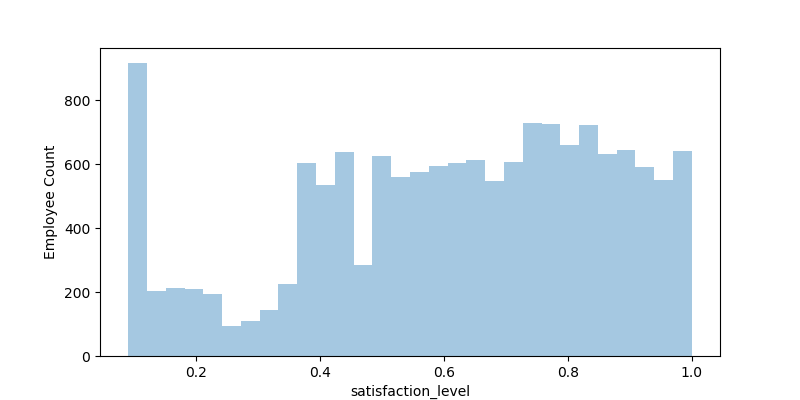

In [52]:
#Нека видим колко са задоволени служителите в тази фирма.
f, ax1 = plt.subplots(figsize=(8, 4))
sns.distplot(data['satisfaction_level'],kde=False).set_ylabel('Employee Count');

Виждаме,че има много голям брой хора с ниво на задоволеност под 10%, но също така има и много хора с над 60% задоволеност


<IPython.core.display.Javascript object>


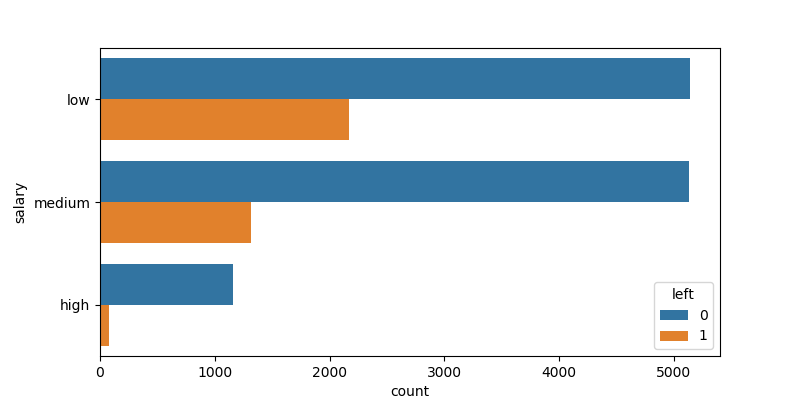

In [53]:
f, ax2 = plt.subplots(figsize=(8, 4))
sns.countplot(y="salary", hue='left', data=data);

Тук ясно се вижда, че почти всички най-значителна част от напуснали служители са с ниска или следна заплата. Това е разбираемо...
Следва да видим напусналите служители спрямо департаментите и броя на проектите.

<IPython.core.display.Javascript object>


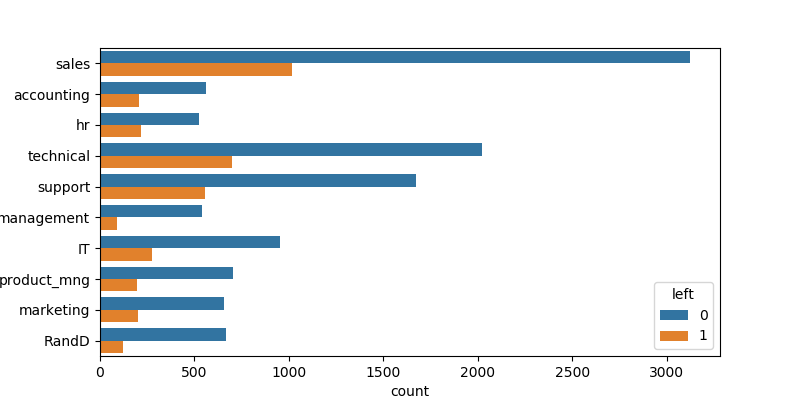

In [55]:
f, ax = plt.subplots(figsize=(8, 4))
sns.countplot(y="sales", hue='left', data=data);

Изглежда, че продажбите, поддръжката и техническия департаменти имат най-голям брой напуснали, докато мениджмънта е с най-малък брой.

И последно да проверим броят напуснали спрямо броят на проектите.

<IPython.core.display.Javascript object>


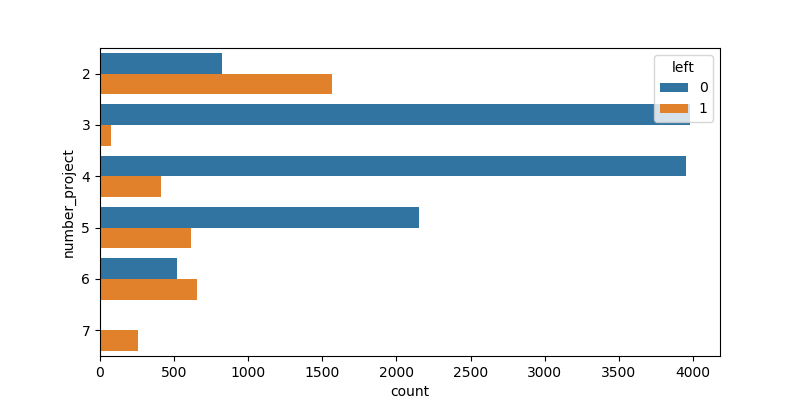

In [58]:
f, ax = plt.subplots(figsize=(8, 4))
sns.countplot(y="number_project", hue='left', data=data);

Тук се забелязва тенденция, в която броят на напуснали се увеличава с броят на проектите, с изключение на брой проекти равен на 2, където броят напуснали е значително по висок. По-инетересното е, че всеки със 7 проекта е напуснал.

## Трениране на модели
Нека вече си натренираме модел и ще започнем с Линейна регресия. Ще се опитаме да анализираме confusion matrix-a за да видим дали наистина високата точнист ни помага да си решим проблема.

In [100]:
from sklearn.model_selection import train_test_split
x = data.drop('left',axis=1)
y = data['left']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, stratify=y)

numeric_cols = x_train.describe().columns
x_train_num = x_train[numeric_cols]
x_test_num = x_test[numeric_cols]

In [105]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x_train_num,y_train)
print(logistic.score(x_train_num, y_train))
print(logistic.score(x_test_num, y_test))

0.766557027291
0.7664


Няма overfit, което е добре и score-a не е лош.

Нека си поглднем теглата, които моделът е открил.

In [106]:
def logistic_regression_features(X, model):
    plt.figure(figsize=(8,5))
    barplot = sns.barplot(x=X.columns, y=model.coef_[0], orient='vertical')
    plt.setp(barplot.get_xticklabels(), rotation=90)
    plt.grid(True)

<IPython.core.display.Javascript object>


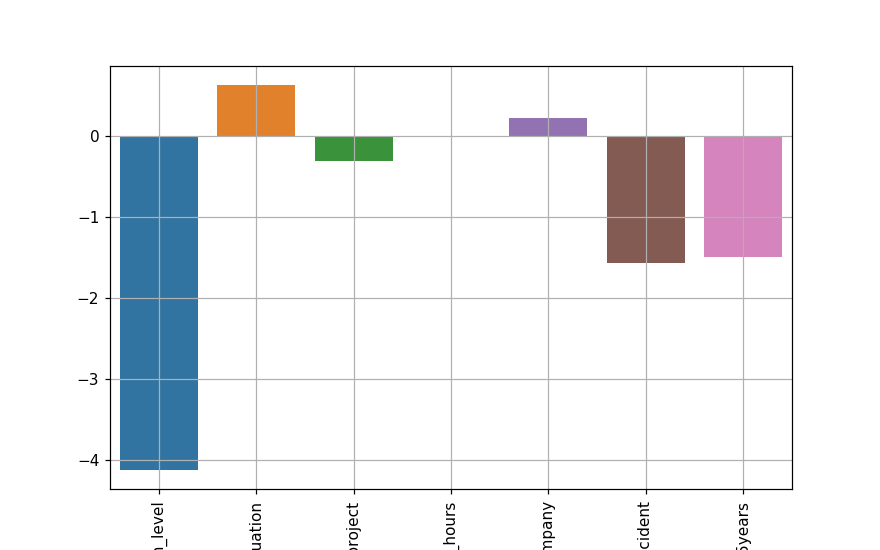

In [107]:
logistic_regression_features(x[numeric_cols], logistic)

Колоните с най-голяма тежест са satisfaction level, work accidents и promotion_last_5years

###### Лек feature engineering
Нека си енкоднем categorical колоните. Ще го направя по "селския" начин понеже имам малко categorical_columns

In [71]:
encoded_data = data.copy()
encoded_data['technical'] =(encoded_data.sales == 'technical').astype(float)
encoded_data['support'] =(encoded_data.sales == 'support').astype(float)
encoded_data['IT'] =(encoded_data.sales == 'IT').astype(float)
encoded_data['product_mng'] =(encoded_data.sales == 'product_mng').astype(float)
encoded_data['sales'] =(encoded_data.sales == 'sales').astype(float)
encoded_data['low'] =(encoded_data.salary == 'low').astype(float)
encoded_data['medium'] =(encoded_data.salary == 'medium').astype(float)
encoded_data['high'] =(encoded_data.salary == 'high').astype(float)
encoded_data=encoded_data.drop('salary',axis=1)
encoded_data.head()
#Вече сме готови с encode-a и нямаме categorical_columns в нашите данни.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,technical,support,IT,product_mng,low,medium,high
0,0.38,0.53,2,157,3,0,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.11,0.88,7,272,4,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.72,0.87,5,223,5,0,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [110]:
x_encoded = encoded_data.drop('left',axis=1)
y_encoded = encoded_data['left']
x_train_encoded, x_test_encoded, y_train_encoded, y_test_encoded = train_test_split(x_encoded, y_encoded, 
                                                                                    random_state=0, stratify=y)

Нека отново натренираме линейна регресия с новите данни.

In [114]:
from sklearn.linear_model import LogisticRegression
logistic_encoded = LogisticRegression()
logistic_encoded.fit(x_train_encoded,y_train_encoded)
print(logistic_encoded.score(x_train_encoded, y_train_encoded))
print(logistic_encoded.score(x_test_encoded, y_test_encoded))

0.796337452218
0.793333333333


<IPython.core.display.Javascript object>


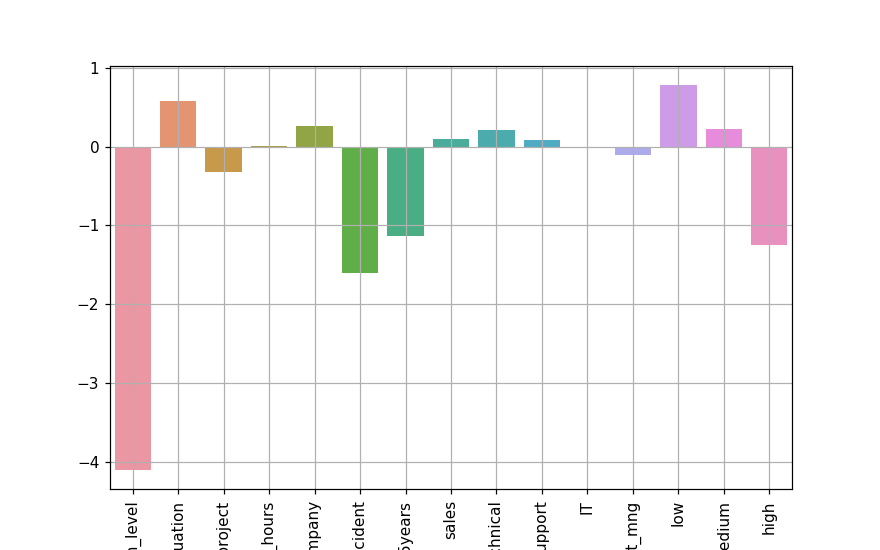

In [117]:
logistic_regression_features(x_encoded, logistic_encoded)

Колоните с най-голяма тежест са satisfaction_level, work_accidents и high salary. Eдинствената разлика след encode-a e че високата заплата е "по-тежка" от броя инциденти. 

Успяхме да подобрим малко резултата и нека сега си начертаем confusion matrix (Кодът съм взел 1 към 1 от лекции понеже ... исках да е краиво :)   )

In [84]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          figsize=(9, 7)):
    matrix = confusion_matrix(y_true, y_pred)

    if normalize:
        matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=figsize)
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 size=int((figsize[0] / 10) * 38),
                 color="white" if matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<IPython.core.display.Javascript object>


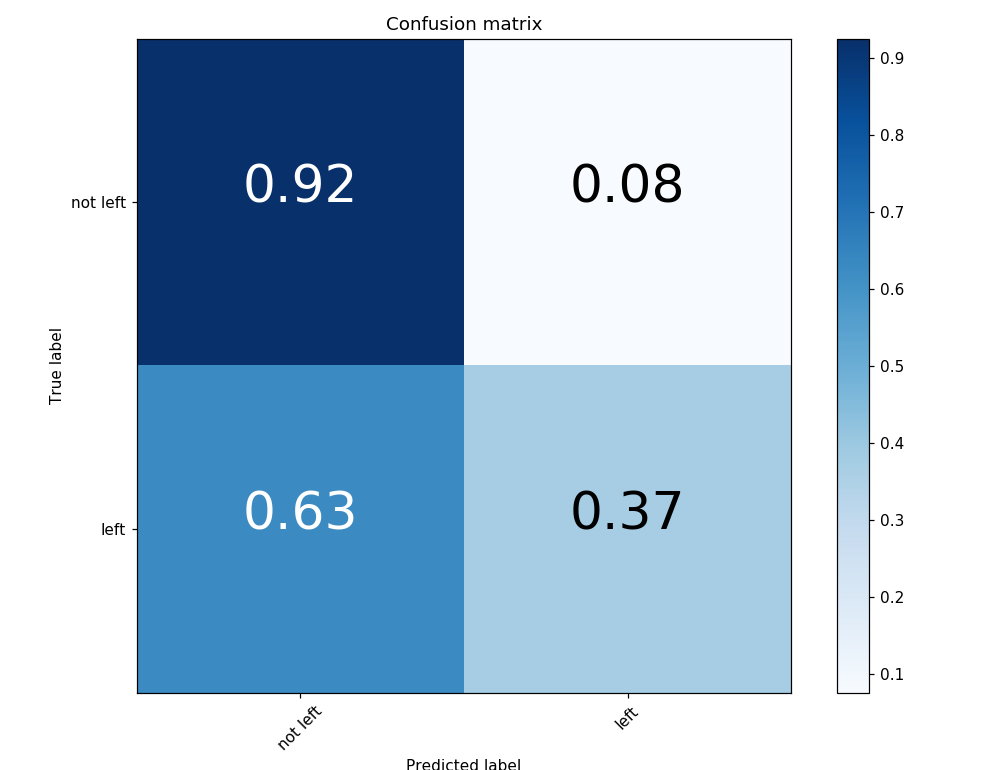

In [115]:
plot_confusion_matrix(y_test_encoded, logistic_encoded.predict(x_test_encoded), ['not left', 'left'],normalize = True)

Виждаме, че познаваме not left в 92% от случаите и left в 37% от случаите.
Ще си изкараме classification_report за да видим recall и precision.

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, logistic_encoded.predict(x_test_encoded), target_names=['not left', 'left']))

             precision    recall  f1-score   support

   not left       0.83      0.92      0.87      2857
       left       0.61      0.37      0.46       893

avg / total       0.77      0.79      0.77      3750



In [ ]:
Нека направим същите неща за RandomForestClassifier.

In [90]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100).fit(x_train_encoded,y_train_encoded)
print(random_forest.score(x_train_encoded,y_train_encoded))
print(random_forest.score(x_test_encoded,y_test_encoded))

1.0
0.990666666667


<IPython.core.display.Javascript object>


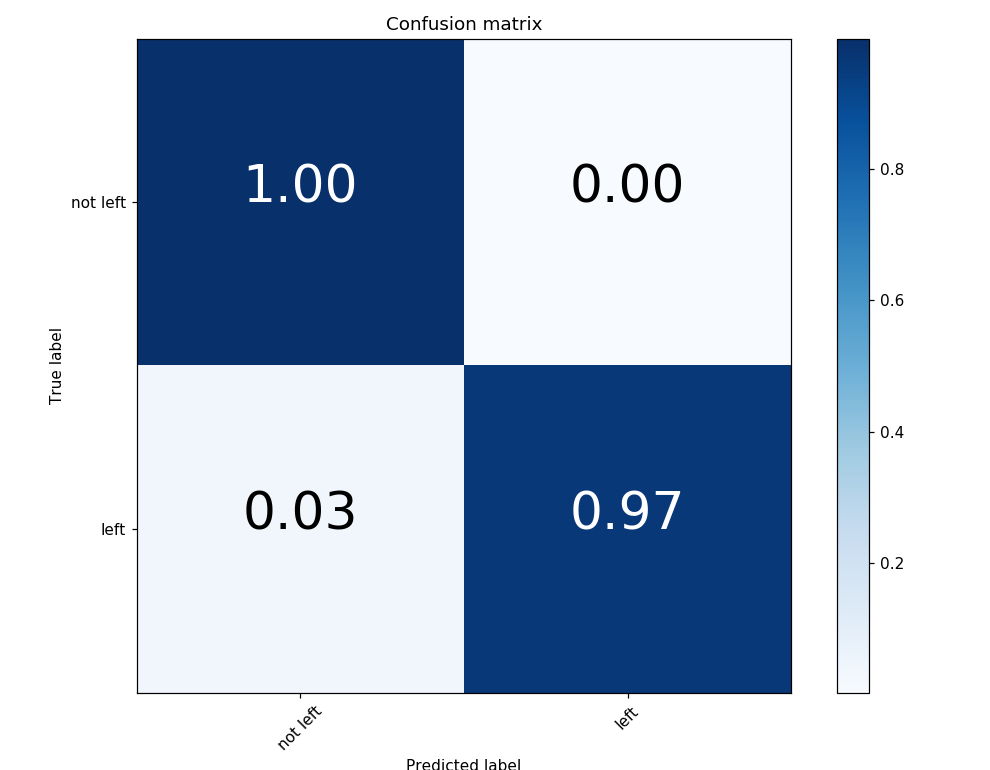

In [91]:
plot_confusion_matrix(y_test_encoded, random_forest.predict(x_test_encoded), ['not left', 'left'],normalize = True)

Тук вече виждаме, че random_forest моделът предвижда not left с 100% точност, left с 97% точност.

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, random_forest.predict(x_test_encoded), target_names=['not left', 'left']))

             precision    recall  f1-score   support

   not left       0.99      1.00      0.99      2857
       left       0.99      0.97      0.98       893

avg / total       0.99      0.99      0.99      3750



## Изводи за този dataset:
#### Голям риск да напуснат имат хората:
        1. С ниска или средно-висока заплата.
        2. С работни часове над 250 .
        3. С брой проекти над 5.
        4. С много ниско или високо ниво на задоволство.